# Predicting heart disease using ML

This notebook looks into various Python-based ML and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease based on various medical attributes.

We're going to take following approach:
1. Problem defination 
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

The original data is taken from Cleavland data from the UCI machine learning repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it avaliable on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation

> If we can reach 90% accuracy at predicting wehether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

### Data dictionary

 1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton 
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion 
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient  (I replaced this with the dummy string "name")

### Preparing the tools
We're going to use Matplotlib, Pandas and NumPy for data analysis and manipulation

In [2]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use("seaborn-v0_8")

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load data

In [33]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [34]:
## Data exploration(exploratory data anlysis or EDA)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

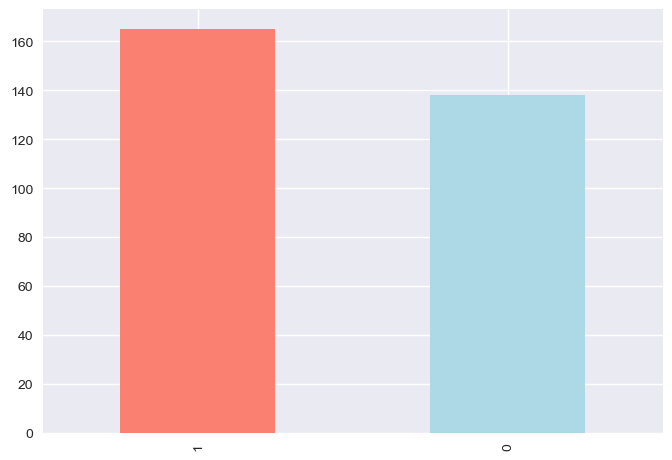

In [36]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
df.isna().sum() # check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according to Sex

In [39]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [40]:
# compare target column with sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


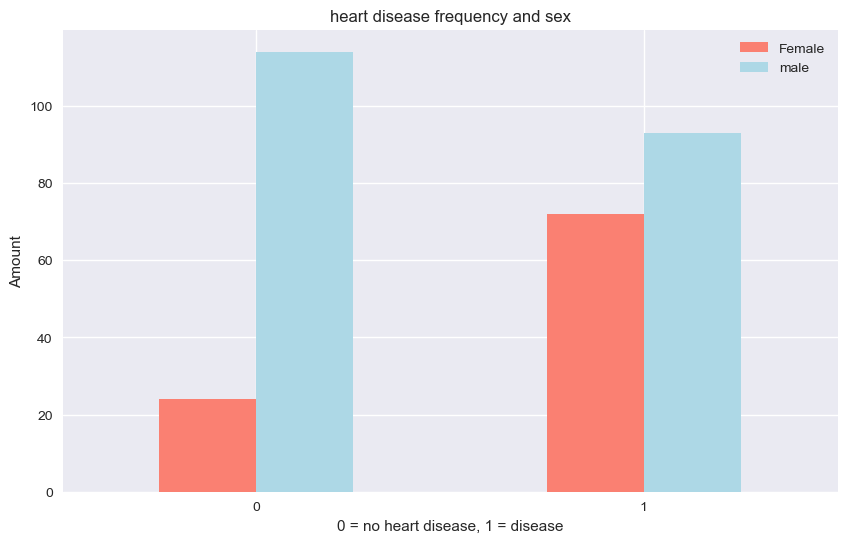

In [41]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                  figsize = (10,6),
                                  color = ["salmon","lightblue"])

plt.title("heart disease frequency and sex")
plt.xlabel("0 = no heart disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(['Female','male'])
plt.xticks(rotation = 0);

### Age vs. Max Heart Rate

In [42]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

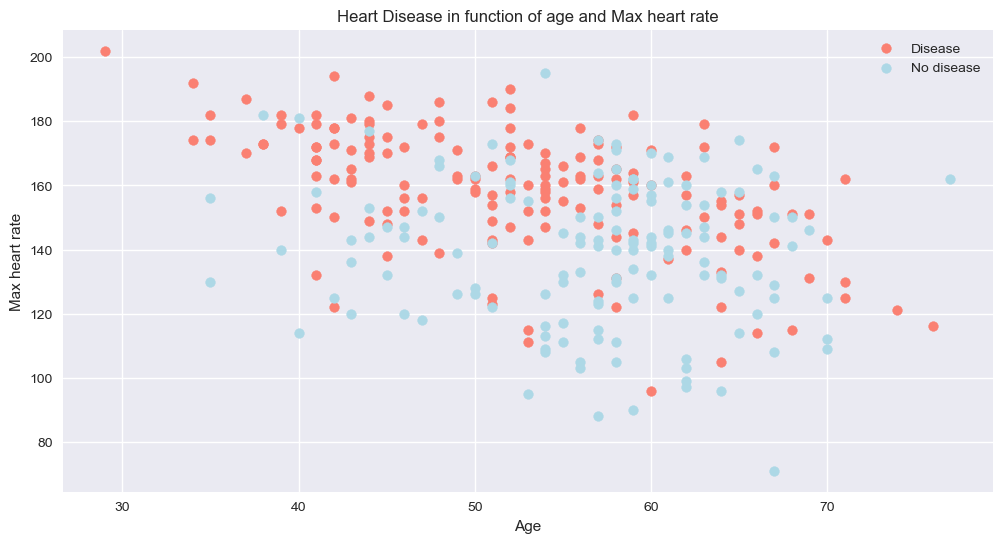

In [43]:
# Create another figure
plt.figure(figsize=(12,6))

#Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "lightblue")

#Add some info
plt.title("Heart Disease in function of age and Max heart rate")
plt.xlabel("Age")
plt.ylabel('Max heart rate')
plt.legend(["Disease", "No disease"]);

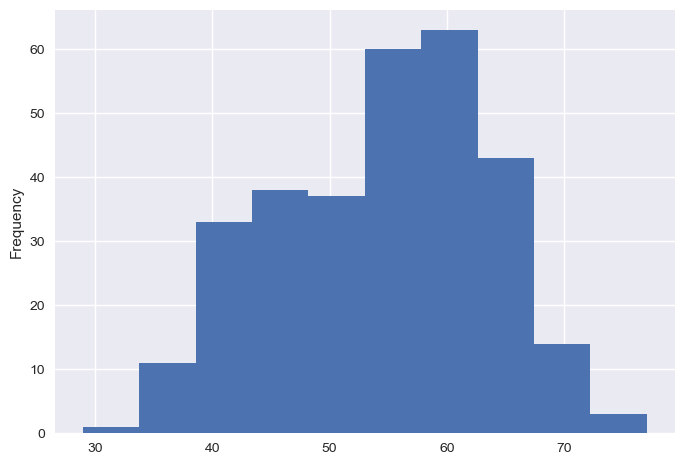

In [46]:
# Check the distribution of age with histogram
df.age.plot.hist();

### Heart Disease vs. Frequency per chest pain type

cp: chest pain type
* Value 0: typical angina 
* Value 1: atypical angina
* Value 2: non-anginal pain 
* Value 3: asymptomatic

In [47]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


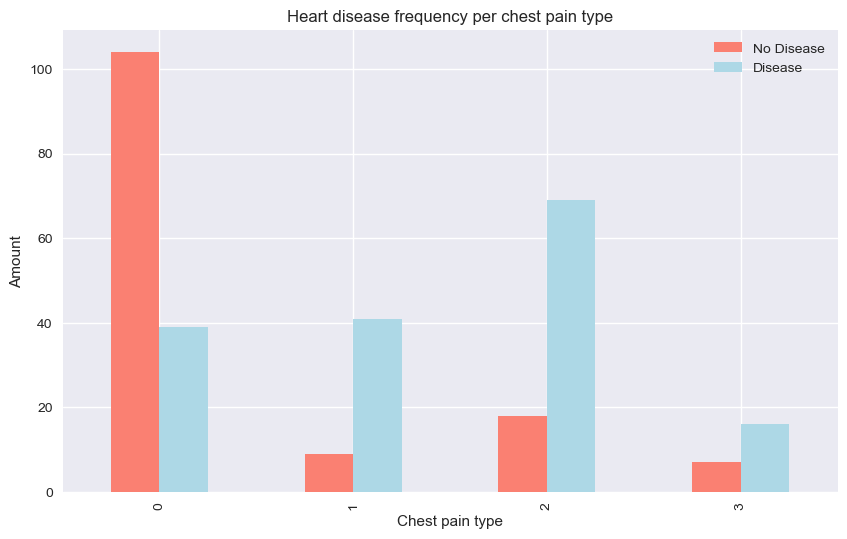

In [49]:
#plot the crosstab
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize = (10,6),
                                 color = ["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);


In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
# Make correaltion matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


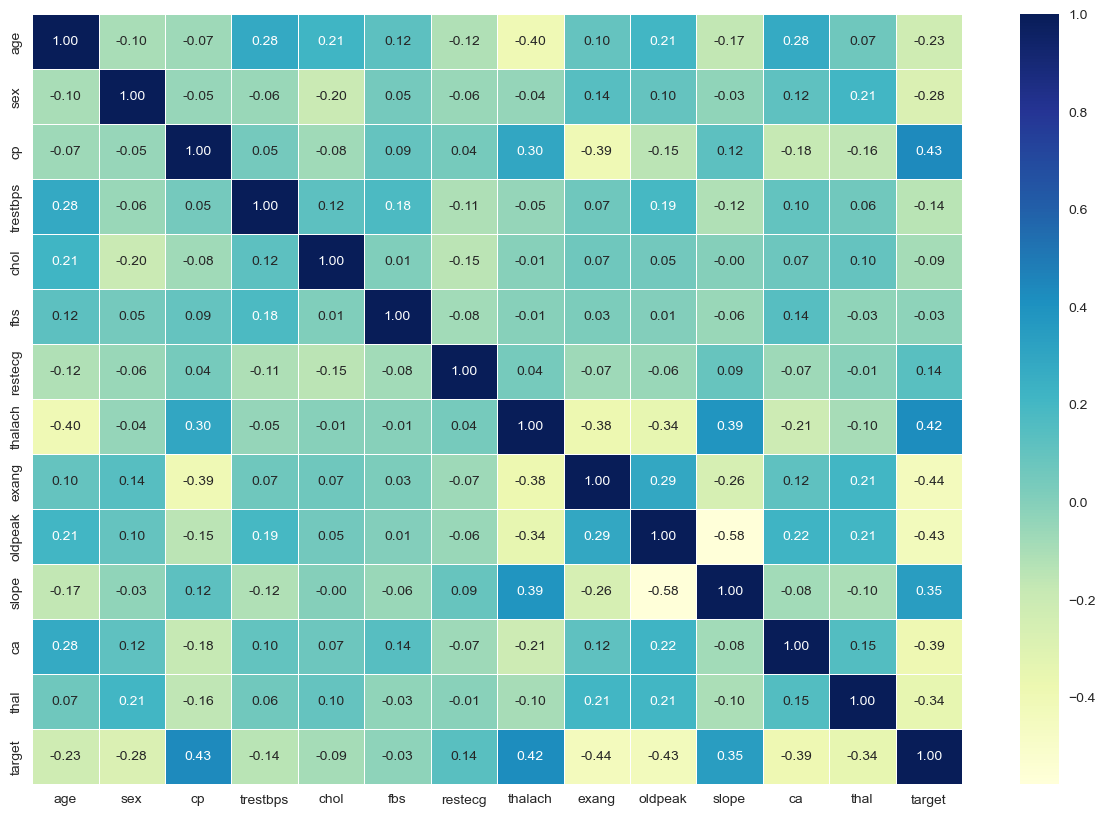

In [64]:
# plot co relation matrix
import seaborn as sns

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt = ".2f",
                 cmap = "YlGnBu");


## 5. Modelling

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Split data into X and y

X = df.drop("target",axis=1)
y = df["target"]

In [67]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
# Split data into test train sets
np.random.seed(42)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [70]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now our data is split into training and testing sets,
we'll train(find patterns on training set) and then test(use the patterns) to build a Machine Learning model.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest neighbours classifier
3. Random forest classifier

In [76]:
# Put models in a dictonary

models = {"Logistic regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given Machine learning models
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
    

In [77]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

/Users/siddhantpatel/Desktop/ML/project_heart_disease/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

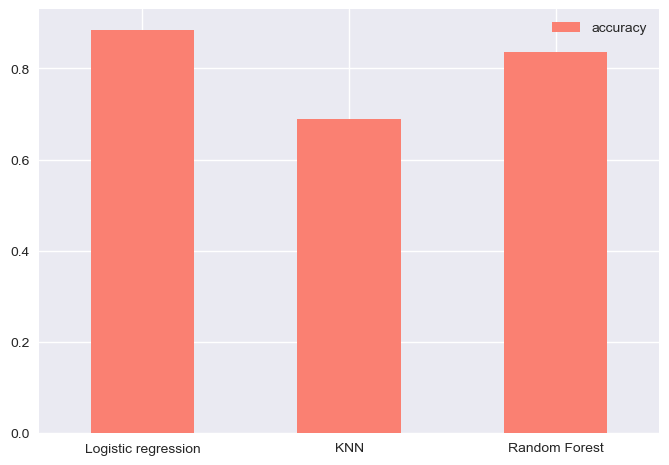

In [81]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color= "salmon")
plt.xticks(rotation = 0);


#### Let's tune our model to improve it

we can look at the following parameters:
   * Hyperparameter tuning
   * Feature importance
   * Confusion matrix
   * Cross-validation
   * Precision
   * Recall
   * F1 score
   * Classification Report
   * ROC curve
   * Area under the curve(AUC)
   
   
### Hyperparameter Tuning
    

In [96]:
#Let's tune KNN


train_scores = []
test_scores = []

# Create a list of different values
neighbours = range(1,21)
#setup KNN instances
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

    

In [97]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [98]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data :75.41%


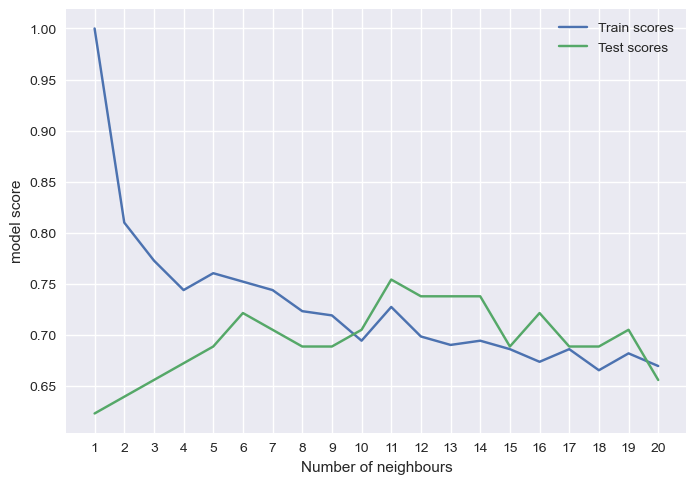

In [106]:
plt.plot(neighbours,train_scores,label = "Train scores")
plt.plot(neighbours,test_scores,label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("model score")
plt.legend()
print(f"Maximum KNN score on the test data :{max(test_scores)*100:.2f}%")

## RandomizedSearchCV
We are going to tune:
* Logistic regression
* RandomForestClassifier

In [115]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# create a hyperparameter grid for RandomForestCLassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [116]:
# Tuning LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LOgisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [117]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [118]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [119]:
# Tuning RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [120]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [121]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [122]:
model_scores

{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## GridsearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [123]:
# Diffferent hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         cv = 5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [124]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [131]:
gs_log_reg.score(X_test,y_test)


0.8852459016393442

## Evaluation

Evaluating our tuned ML Classifier, beyond accuracy:

* ROC curve and AUC score
* Confusion Matrix
* Precision
* Recall
* F1 score
* Classification Report

To make comparisons and evaluate our trained model, first we need to make predictions...

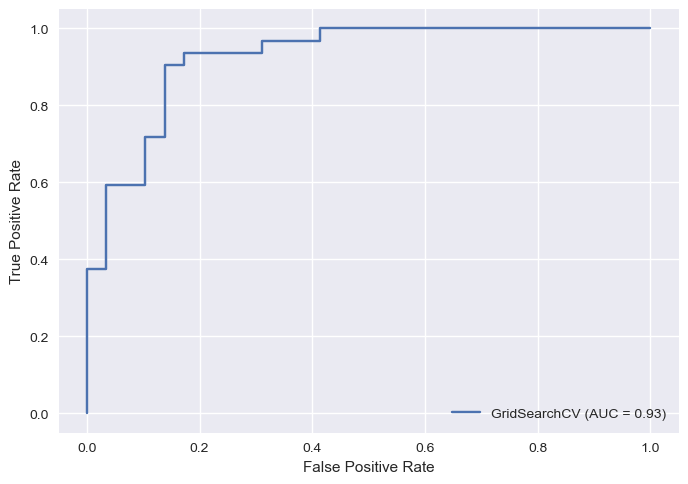

In [144]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import roc_curve, auc


y_probs = gs_log_reg.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)
auc = auc(fpr,tpr)

display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc,estimator_name="GridSearchCV")
display.plot();

In [146]:
# confusion matrix
y_preds = gs_log_reg.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

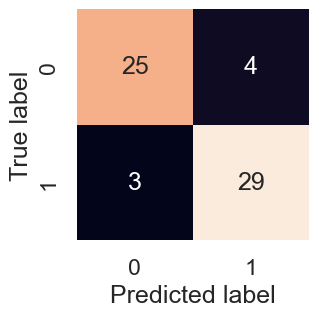

In [150]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using Seaborn heatmap
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

 Now we got AUC curve and confusion matrix, let's get classification report as well as cross-validation precision recall and f1 score.

In [151]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall, and f1-score of our model using cross validation using `cross_val_score()`

In [152]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [153]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [157]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,X,y,
                        cv = 5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [158]:
# Cross validated precision
cv_precision = cross_val_score(clf,X,y,
                        cv = 5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [160]:
# Cross validated recall
cv_recall = cross_val_score(clf,X,y,
                        cv = 5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [161]:
# Cross validated f1-score
cv_f1 = cross_val_score(clf,X,y,
                        cv = 5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

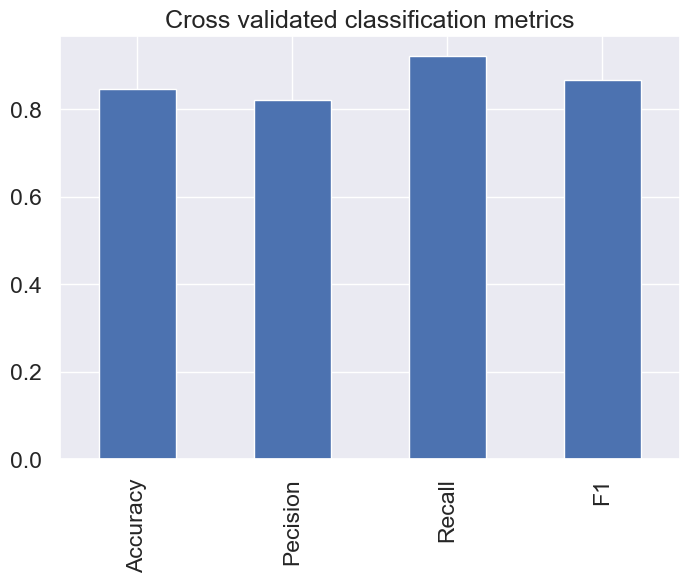

In [169]:
# Visualise our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Pecision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title = "Cross validated classification metrics",
                     legend = False);

### Feature Importance

"Which features contributed most to the outcomes of the model?"

In [170]:
# Let's find feature importance for our LogisticRegression

gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [173]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=  0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train,y_train);

In [174]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [175]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [176]:
# Match features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

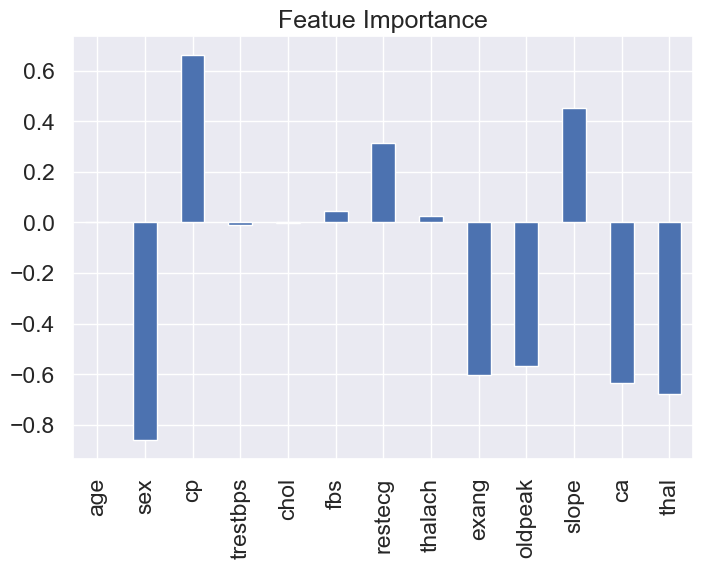

In [178]:
# Visualise Feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "Featue Importance",legend = False);